# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import Rnn2d

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(Rnn2d)

# Import the required utils
from utils.setuputil import setup_simple_config, display_simple_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.Rnn2d import Rnn2dSquare

## Config

In [2]:
# Define the input configuration for the RNN model
setup_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "rnn",         
    "model_name": "Rnn2dSquare",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 12,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # RNN-Specific Parameters
    "hidden_dim": 100,         # Dimension of the hidden state vector
    "rnn_layers": 2,           # Number of RNN layers
    "dropout_rate": 0.05,      # Dropout rate for regularization
    "nonlinearity": "relu",    # Nonlinearity for the RNN (e.g., relu, tanh)
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 10,
    "lr": 7e-5,
    "mu": 0.25,
    "epochs": 20,
    "patience": 3,
    "save_int": 5,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_simple_config(setup_config)
display_simple_config(config)

Getting Vocab: 100%|████████████████████████████| 40/40 [00:03<00:00, 12.79it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|██████████| 5597/5597 [00:00<00:00, 69549.88it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|████████████████████████| 40/40 [00:00<00:00, 198.65it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 6941.91it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 5054.60it/s]



5(P) = 5(G) + 0(E)

Final configuration:
{
  "env": "gcp",
  "approach": "rnn",
  "model_name": "Rnn2dSquare",
  "DEVICE": "cuda:0",
  "THREADS": 12,
  "seed": 42,
  "data_dir": "../../data/farzan",
  "data_ds": "manual",
  "train_dir": "../../data/farzan/manual_train",
  "val_dir": "../../data/farzan/manual_val",
  "test_dir": "../../data/farzan/manual_test",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Tensor>",
  "hidden_dim": 100,
  "rnn_layers": 2,
  "dropout_rate": 0.05,
  "nonlinearity": "relu",
  "train_loader": "<Train SpreadsheetDataLoader Object>",
  "val_loader": "<Validation SpreadsheetDataLoader Object>",
  "test_loader": "<Test SpreadsheetDataLoader Object>",
  "batch": 10,
  "lr": 7e-05,
  "mu": 0.25,
  "epochs": 20,
  "patience": 3,
  "save_int": 5,
  "save_dir": "../models/",
  "save_name": "grnn42_Rnn2dSquare_manual_100x100x32_bSp5k_bsz10lr7e-5ep20

## Local Variables

In [3]:
# Define local variables from the generated config dictionary to run file
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# RNN Specific Params
hidden_dim = config["hidden_dim"]
rnn_layers = config['rnn_layers']
dropout_rate = config['dropout_rate']
nonlinearity = config['nonlinearity']


# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

# Model moved to device with parameters from the config
untrained_model = Rnn2dSquare(
    hidden_state_dim=hidden_dim,
    rnn_layers=rnn_layers,
    embedding_matrix=spreadsheet_wvs,
    dropout_rate=dropout_rate,
    nonlinearity=nonlinearity
).to(DEVICE)

# Print the model to confirm initialization
print(untrained_model)

Rnn2dSquare(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_rnn): RNN(50, 100, num_layers=2, batch_first=True, dropout=0.05)
  (_pred): Linear(in_features=200, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|██████████████████████| 1/1 [00:07<00:00,  7.40s/it]


Train Loss: 867.3282623291016, Perplexity: 1.0353019574469082
Val Loss: 724.2340087890625, Perplexity: 1.029393053750664


Epoch 1


Validation Processing: 100%|██████████████████████| 1/1 [00:07<00:00,  7.35s/it]


Train Loss: 708.0849761962891, Perplexity: 1.0287283203907605
Val Loss: 604.8032836914062, Perplexity: 1.0244871350765592


Epoch 2


Validation Processing: 100%|██████████████████████| 1/1 [00:07<00:00,  7.14s/it]


Train Loss: 603.2823486328125, Perplexity: 1.0244248098363986
Val Loss: 512.0492553710938, Perplexity: 1.0206931651988136


Epoch 3


Validation Processing: 100%|██████████████████████| 1/1 [00:07<00:00,  7.19s/it]


Train Loss: 515.9758834838867, Perplexity: 1.0208534930885242
Val Loss: 434.2115783691406, Perplexity: 1.017520171934107


Epoch 4


Validation Processing: 100%|██████████████████████| 1/1 [00:07<00:00,  7.03s/it]


Train Loss: 442.37928009033203, Perplexity: 1.017852658294524
Val Loss: 366.84466552734375, Perplexity: 1.01478197515878

Model Saved

Epoch 5


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.91s/it]


Train Loss: 379.4359817504883, Perplexity: 1.0152932015180993
Val Loss: 307.9031982421875, Perplexity: 1.0123922837604478


Epoch 6


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.92s/it]


Train Loss: 319.5217742919922, Perplexity: 1.0128628953783592
Val Loss: 254.3817138671875, Perplexity: 1.0102272126319203


Epoch 7


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.83s/it]


Train Loss: 265.7199935913086, Perplexity: 1.0106854860935885
Val Loss: 204.81771850585938, Perplexity: 1.008226360816261


Epoch 8


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.76s/it]


Train Loss: 220.76092910766602, Perplexity: 1.0088695404896337
Val Loss: 158.1082305908203, Perplexity: 1.006344370019619


Epoch 9


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.78s/it]


Train Loss: 184.561767578125, Perplexity: 1.0074097883224309
Val Loss: 112.87870025634766, Perplexity: 1.0045253566497545

Model Saved

Epoch 10


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.85s/it]


Train Loss: 145.82688522338867, Perplexity: 1.0058501209197654
Val Loss: 69.9869155883789, Perplexity: 1.002803398817394


Epoch 11


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.88s/it]


Train Loss: 123.00397300720215, Perplexity: 1.0049322827778018
Val Loss: 30.2694034576416, Perplexity: 1.0012115094236524


Epoch 12


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.72s/it]


Train Loss: 107.39166831970215, Perplexity: 1.0043049063344736
Val Loss: 24.613985061645508, Perplexity: 1.0009850442401784


Epoch 13


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.71s/it]


Train Loss: 104.26655960083008, Perplexity: 1.0041793717000569
Val Loss: 25.39457893371582, Perplexity: 1.0010162992397877


Epoch 14


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.69s/it]


Train Loss: 101.33382606506348, Perplexity: 1.0040615789885123
Val Loss: 21.497243881225586, Perplexity: 1.000860259566436

Model Saved

Epoch 15


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.80s/it]


Train Loss: 100.39912796020508, Perplexity: 1.004024039912069
Val Loss: 19.898284912109375, Perplexity: 1.000796248233933


Epoch 16


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.75s/it]


Train Loss: 98.1135082244873, Perplexity: 1.0039322514215745
Val Loss: 18.82142448425293, Perplexity: 1.0007531404473182


Epoch 17


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.69s/it]


Train Loss: 97.69081687927246, Perplexity: 1.0039152774261157
Val Loss: 17.838836669921875, Perplexity: 1.0007138081066347


Epoch 18


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.82s/it]


Train Loss: 95.96340370178223, Perplexity: 1.0038459127633996
Val Loss: 16.758386611938477, Perplexity: 1.0006705601895058


Epoch 19


Validation Processing: 100%|██████████████████████| 1/1 [00:06<00:00,  6.78s/it]

Train Loss: 96.82646751403809, Perplexity: 1.0038805686848171
Val Loss: 15.730669975280762, Perplexity: 1.0006294248037213

Model Saved


TRAINING DONE at epoch 19, best epoch 19
Train Loss = 96.82646751403809, Perplexity = 1.0038805686848171
Val Loss = 15.730669975280762, Perplexity = 1.0006294248037213


# Evaluation

In [26]:
# Define params for evaluation
thresh = 0.5
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(1,1): 1.00000000000000000000

NB to B ratio: Predicted = 0:10000 | Actual = 9930:70
Accuracy: 0.70% | Precision: 0.70% | Recall: 100.00% | F1-Score: 0.01



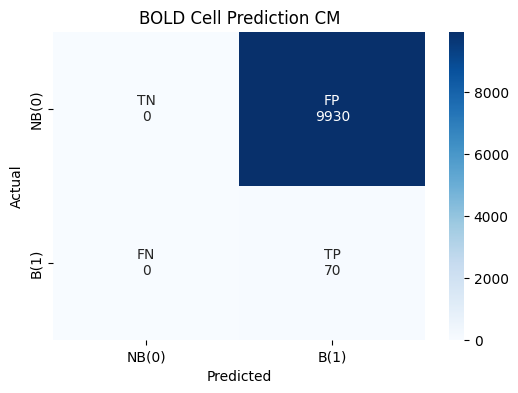


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)


Filename: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(1,1): 1.00000000000000000000

NB to B ratio: Predicted = 0:10000 | Actual = 9937:63
Accuracy: 0.63% | Precision: 0.63% | Recall: 100.00% | F1-Score: 0.01



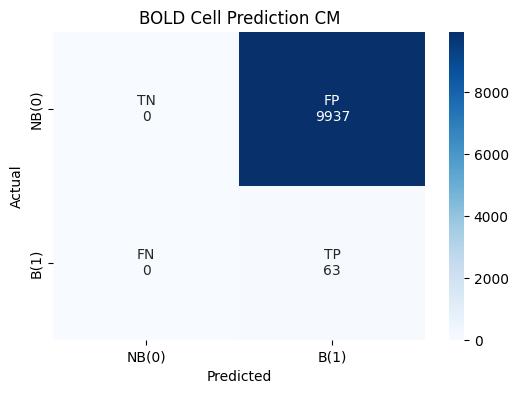


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [28]:
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)


Filename: ../../data/farzan/manual_test/dlportfolio-by-school-type.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.00000021236610336928
(5,2): 0.00000021237256930817

NB to B ratio: Predicted = 10000:0 | Actual = 9936:64
Accuracy: 99.36% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



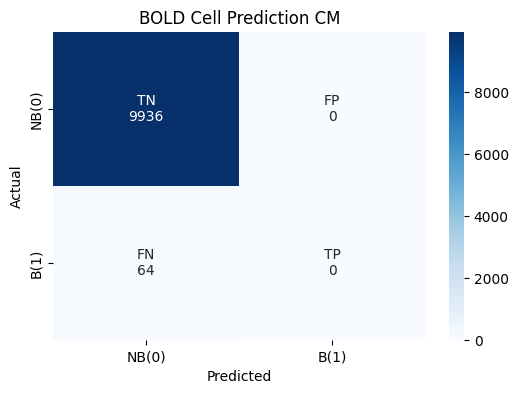


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0


In [29]:
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|████████████████████████████| 4/4 [00:26<00:00,  6.71s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 160000:240000 | Actual = 396714:3286
Accuracy: 40.11% | Precision: 0.77% | Recall: 56.98% | F1-Score: 0.02



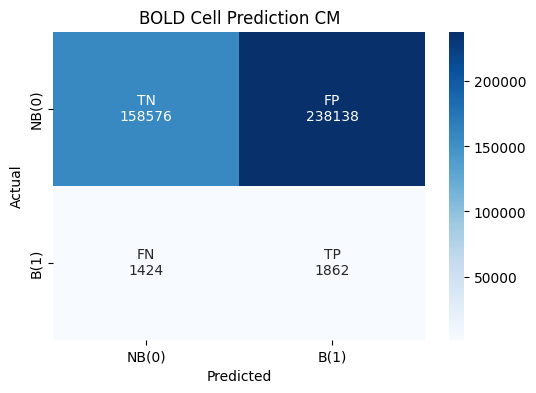

In [32]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:06<00:00,  6.49s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 20000:30000 | Actual = 49602:398
Accuracy: 40.01% | Precision: 0.67% | Recall: 50.75% | F1-Score: 0.01



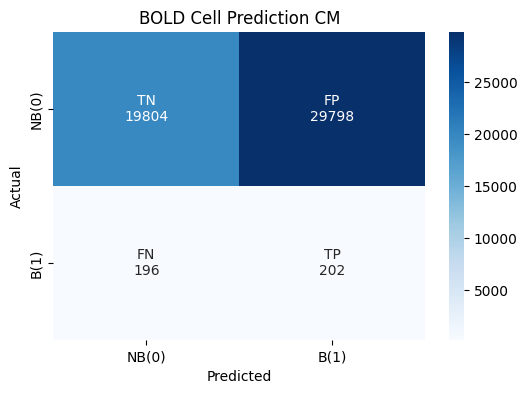

In [31]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:06<00:00,  6.55s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 10000:40000 | Actual = 49606:394
Accuracy: 20.53% | Precision: 0.83% | Recall: 83.76% | F1-Score: 0.02



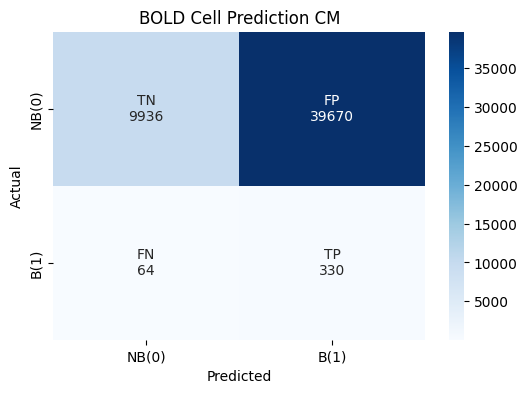

In [33]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)